In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


In [2]:
# Create dataset
np.random.seed(42)
data = {
    'Feature1': np.random.randint(10, 100, 50),
    'Feature2': np.random.randint(1000, 5000, 50),
    'Class': np.random.choice([0, 1], 50)
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Feature1,Feature2,Class
0,61,3061,1
1,24,1241,0
2,81,3041,1
3,70,3824,0
4,30,4417,0


In [5]:
df.describe()

,Feature1,Feature2,Class
count,50.000000,50.0000,50.000000
mean,56.740000,3210.0000,0.400000
std,26.977549,1179.9111,0.494872
min,11.000000,1034.0000,0.000000
25%,31.000000,2297.0000,0.000000
50%,61.500000,3285.0000,0.000000
75%,73.000000,4294.5000,1.000000
max,98.000000,4943.0000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Feature1  50 non-null     int32
 1   Feature2  50 non-null     int32
 2   Class     50 non-null     int32
dtypes: int32(3)
memory usage: 728.0 bytes


In [22]:
df.isnull().sum()

Feature1    0
Feature2    0
Class       0
dtype: int64

In [ ]:
df['Feature1'].unique()

array([61, 24, 81, 70, 30, 92, 96, 84, 97, 33, 12, 31, 62, 11, 39, 47, 73,
       69, 42, 85, 67, 98, 58, 68, 51, 89, 71, 56, 60, 64, 16, 82, 48, 27,
       13])

: 

In [18]:
X = df[['Feature1', 'Feature2']]
y = df[['Class']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train_scaled, y_train)

c:\Users\pradeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.60
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.20      1.00      0.33         1

    accuracy                           0.60        10
   macro avg       0.60      0.78      0.52        10
weighted avg       0.92      0.60      0.68        10



c:\Users\pradeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\pradeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\pradeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\pradeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.

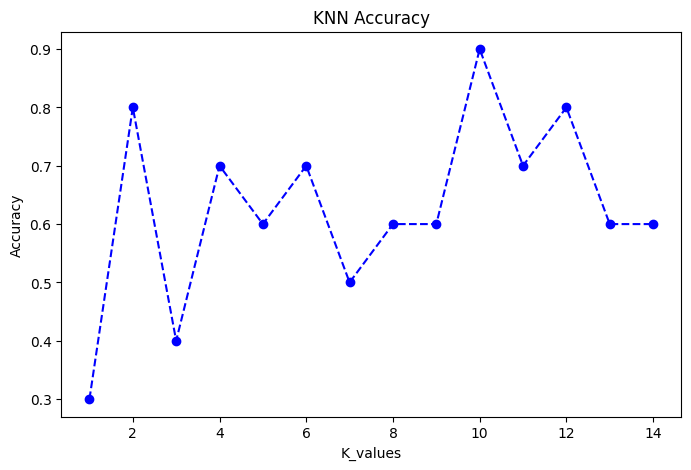

In [57]:
import matplotlib.pyplot as plt

k_values = range(1,15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test,y_pred))


plt.figure(figsize=(8, 5))
plt.plot(k_values,accuracies,marker='o',linestyle = 'dashed',color = 'blue')
plt.xlabel('K_values')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.show()

In [ ]:


# Split dataset (Optional: If you want a separate test set)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Range of K values to test
k_values = range(1, 16)
cv_scores = []  # Store cross-validation scores

# Perform 5-Fold Cross-Validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-Fold CV
    cv_scores.append(scores.mean())  # Store mean accuracy

# Find the best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K found using cross-validation: {best_k}")

# Plot accuracy vs. K values
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Choosing the Best K using Cross-Validation")
plt.show()


KeyError: "['target'] not found in axis"

In [1]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-validation scores: [1.         0.96666667 0.96666667 0.9        0.96666667]
Mean Accuracy: 0.96


In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different k values using cross-validation
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-Fold CV
    print(f'k={k}, Average Accuracy: {scores.mean():.4f}')


k=1, Average Accuracy: 0.9500
k=3, Average Accuracy: 0.9583
k=5, Average Accuracy: 0.9417
k=7, Average Accuracy: 0.9417
k=9, Average Accuracy: 0.9333


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

# Initialize SVM model
svm_model = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.9583333333333334
